In [60]:
from src import *

In [69]:
np.random.seed(99)
null_repetition = 1000
files = os.listdir('./resources/static_grad/individual_level/')
pred_grid = np.zeros((len(files), len(files)))
null_grid = np.zeros((null_repetition,len(files), len(files)))
for k in tqdm(range(len(files))):
    target   = load('./resources/static_grad/individual_level/{}'.format(files[k]))
    for j in range(len(files)):
        database = load('./resources/static_grad/individual_level/{}'.format(files[j]))

        subjects = list(database.keys())
        database_grad = [database[sub] for sub in subjects]

        matches = []
        null_matches = np.zeros((null_repetition, len(subjects)))
        for sidx, sub in enumerate(subjects):
            target_grad   = target[sub]

            # align all database gradients to target gradient
            aligned_grad,_,score = procrustes_align(database_grad, ref=target_grad)
            if score > 100: print('Warning: might not be well-aligned') #the choice of 100 is arbitrary and empirically motivated

            distances = [gradients_distance(aligned_grad[i], target_grad, pmethod="L2") for i in range(len(aligned_grad))]
            indexmatch = np.argsort(distances)[:1]
            bestmatch = [subjects[b] for b in indexmatch]

            for nbr in range(null_repetition):
                null_subjects = deepcopy(subjects)
                np.random.shuffle(null_subjects)
                nullmatch = [null_subjects[b] for b in indexmatch]
                null_matches[nbr, sidx] = sub in nullmatch

            matches.append(sub in bestmatch)

        null_grid[:,k,j] = np.mean(null_matches,axis=1)

        pred_grid[k,j]   = np.mean(matches)

100%|██████████| 14/14 [05:48<00:00, 24.88s/it]


Text(0.5, 1.0, 'significancy')

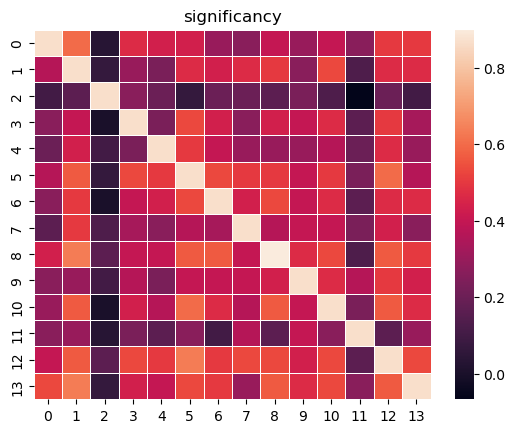

In [80]:
sns.heatmap(pred_grid - np.percentile(null_grid,99, axis=0), linewidth=0.5)
plt.title('significancy')

Text(0.5, 1.0, 'identifiability accuracy')

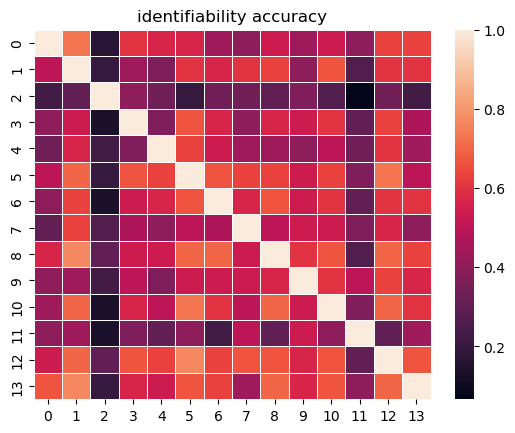

In [71]:
sns.heatmap(pred_grid, linewidth=0.5)
plt.title("identifiability accuracy")

In [84]:
pred_grid.mean(axis=0)

array([0.47619048, 0.63571429, 0.25952381, 0.54761905, 0.50714286,
       0.61666667, 0.56428571, 0.53809524, 0.58571429, 0.53809524,
       0.5952381 , 0.37380952, 0.62380952, 0.5547619 ])

(-15.0, 20.0)

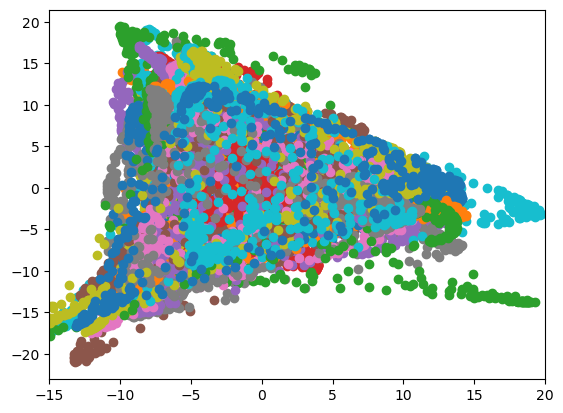

In [82]:
plt.scatter(target_grad[:,0],target_grad[:,1])
for i in range(len(aligned_grad)):
    plt.scatter(aligned_grad[i][:,0],aligned_grad[i][:,1])

plt.xlim(-15,20)